# NRP   : 2172019
# Nama : Thoriq Hidayansyah

### Import Library

In [27]:
import numpy as np
import sklearn
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns

### Membaca file csv dataset Milk Quality Prediction

In [28]:
df = read_csv('milknew.csv')
df

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


### Visualisasi Dataset

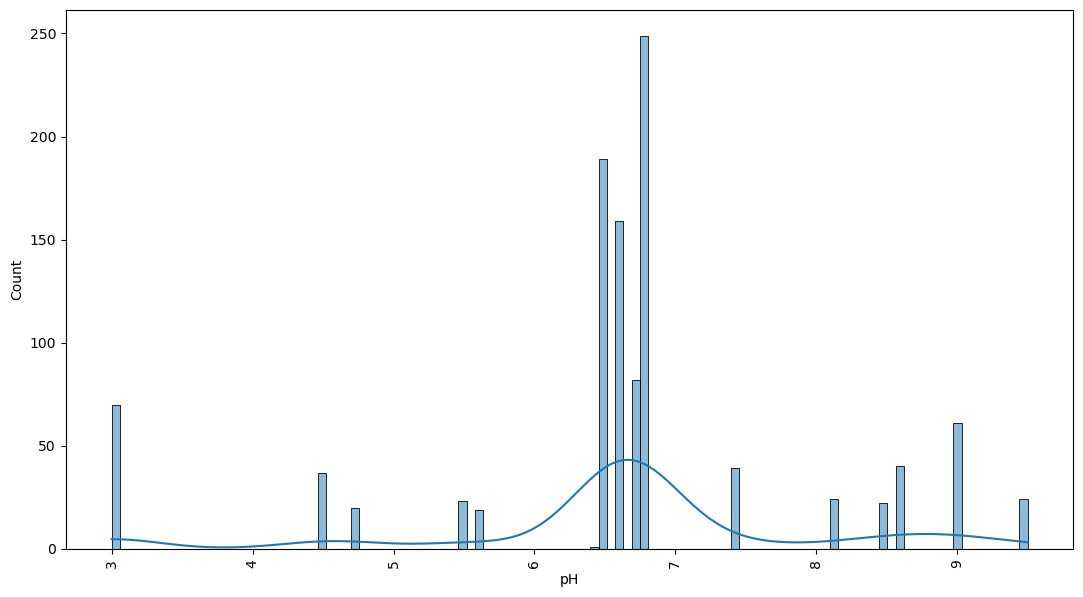

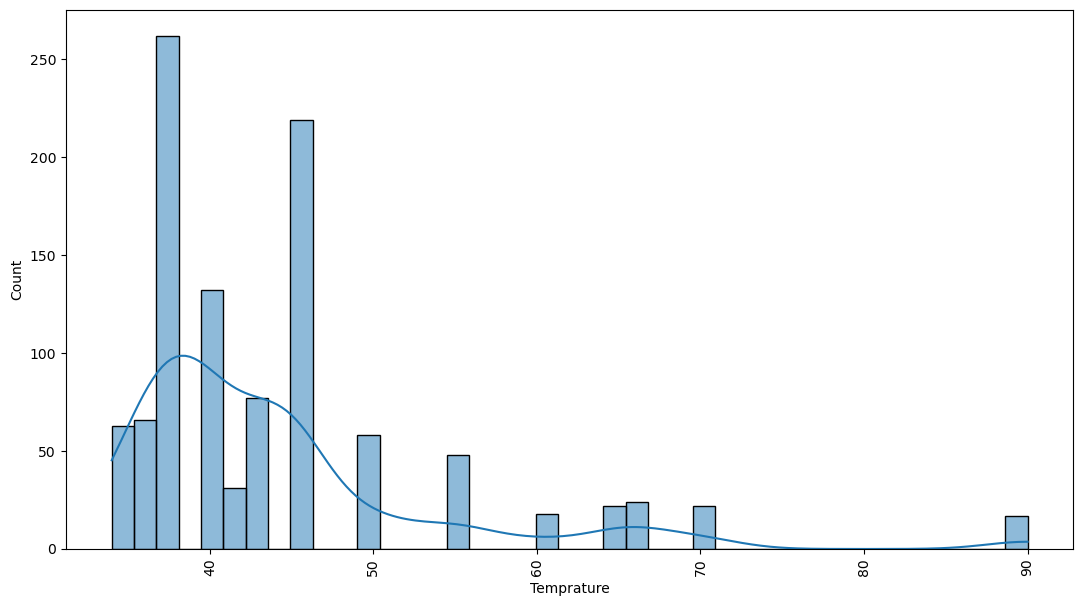

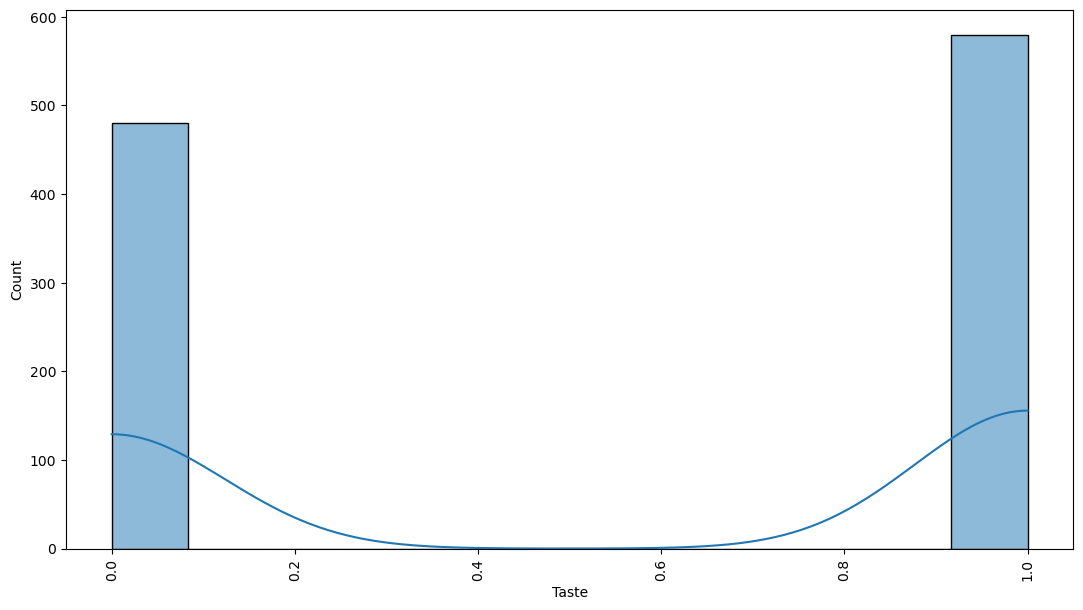

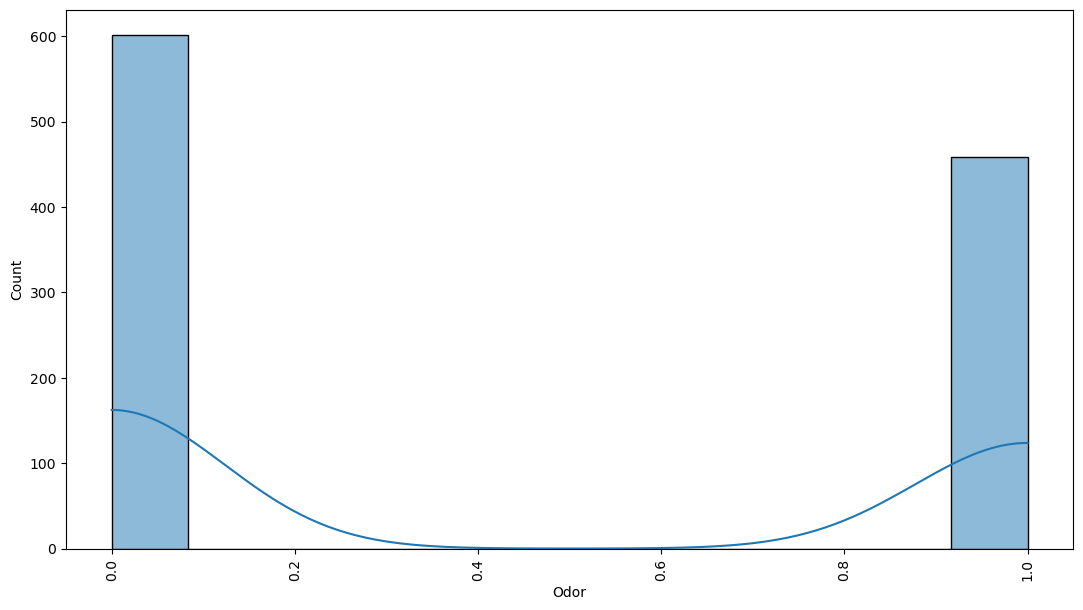

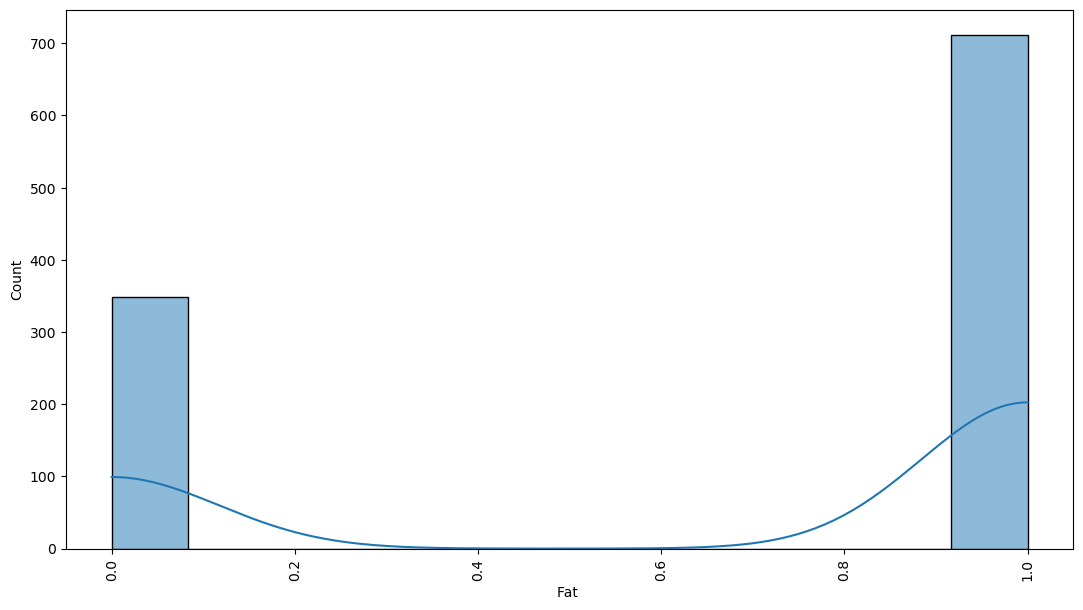

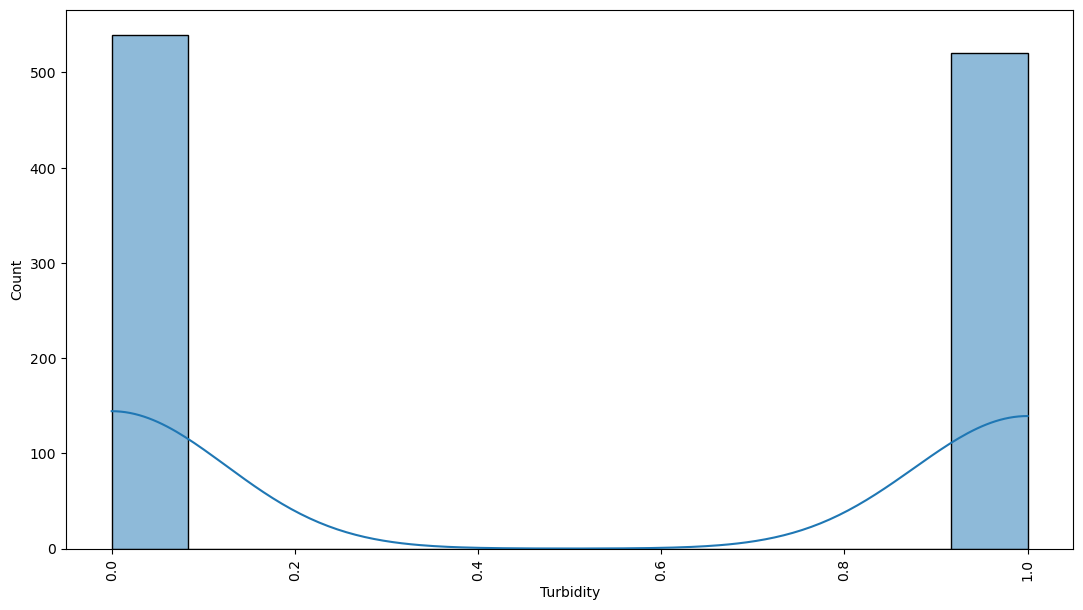

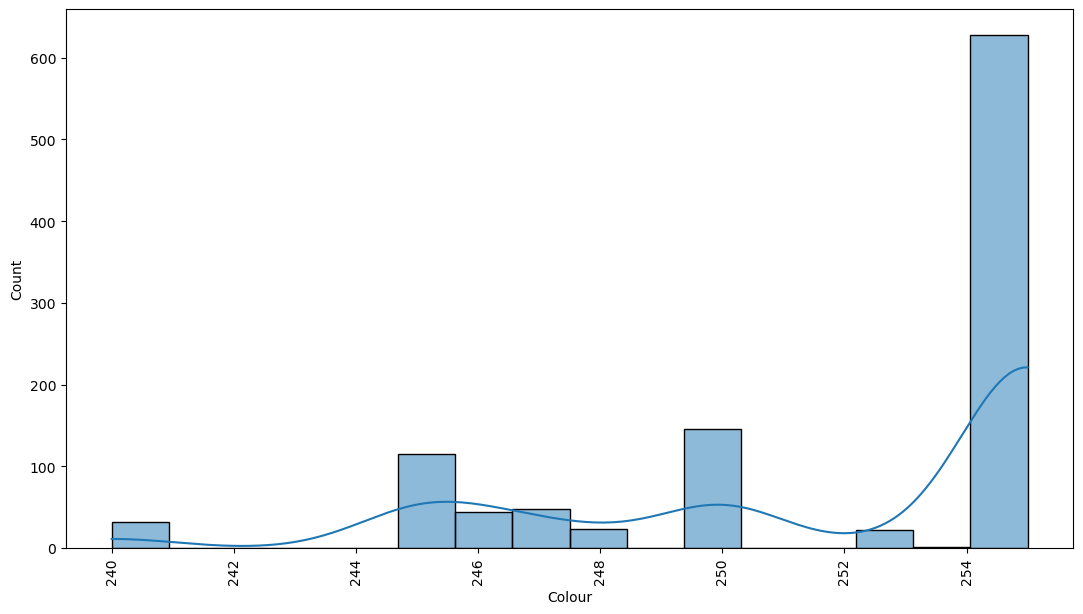

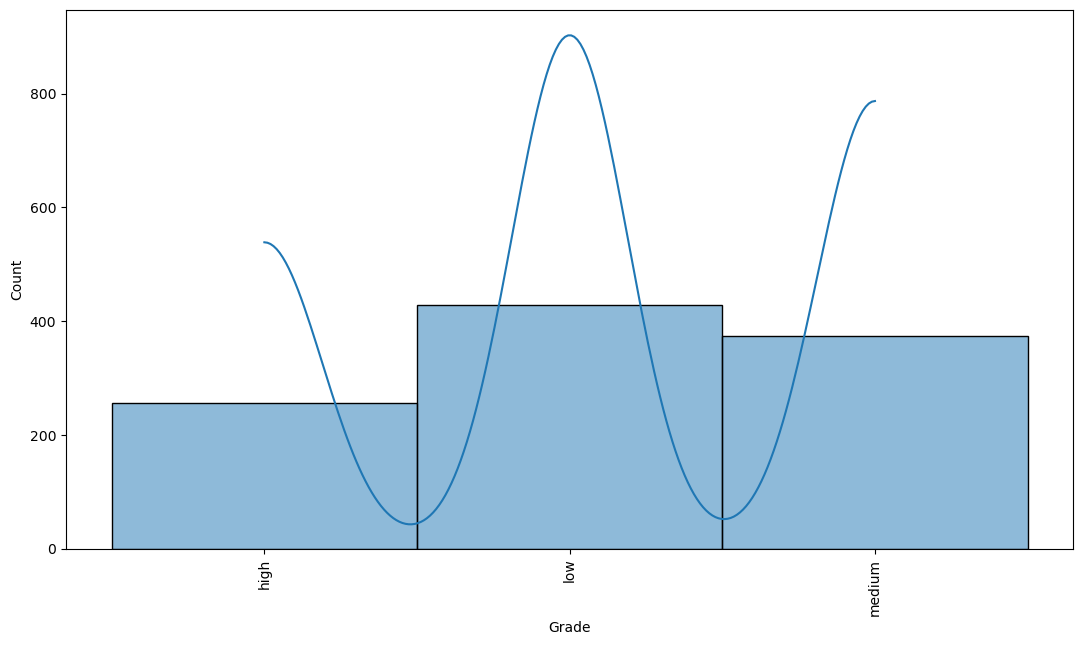

In [29]:
for i in df.columns:
    plt.figure(figsize=(13,7))
    sns.histplot(data = df[i], kde=True, multiple='stack')
    plt.xticks(rotation=90)
    plt.show()

#### Visualisasi di atas memperlihatkan tentang penghitungan data dari semua kolom yang ada

### Data Preparation

In [30]:
df.shape

(1059, 8)

In [31]:
df.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [32]:
encoder = OrdinalEncoder()

df_ordinal = df.copy()
df_ordinal[['Grade']] = encoder.fit_transform(df[['Grade']])

df_ordinal

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,0.0
1,6.6,36,0,1,0,1,253,0.0
2,8.5,70,1,1,1,1,246,1.0
3,9.5,34,1,1,0,1,255,1.0
4,6.6,37,0,0,0,0,255,2.0
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,2.0
1055,6.7,38,1,0,1,0,255,0.0
1056,3.0,40,1,1,1,1,255,1.0
1057,6.8,43,1,0,1,0,250,0.0


In [33]:
X=df_ordinal.drop('Grade',axis=1)
y=df_ordinal['Grade']

X = X.to_numpy()
y = y.to_numpy()

### Memisahkan train_set dan test_set menjadi 0.70 dan 0.30

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state = 42)

### Melakukan normalisasi pada kolom-kolomyang bertipe data numerik, dengan menggunakan Z-normalization

In [35]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_train_std = ss.fit_transform(X_train)
X_test_std = ss.transform(X_test)

### Menggunakan Model Logistic Regression dengan parameter solver =  saga dan penalty = l2 / Regularisasi Ridge

In [36]:
model = LogisticRegression(solver='saga', penalty='l2')

### Melatih model dengan data train

In [37]:
model.fit(X_train_std,y_train.ravel())

LogisticRegression(solver='saga')

### Menampilkan confusion matrix, precision, recall, accuracy, ROC curve, nilai coefficient dan intercept dari model

In [38]:
scores = cross_val_score(model, X_train_std, y_train.ravel(), cv= 3)

In [39]:
print("Training Accuracy :",model.score(X_train_std,y_train))
print("Testing Accuracy :",model.score(X_test_std,y_test))
print("Accuracy: ", scores.mean()*100,"% (",scores.std()*100,"%)")

Training Accuracy : 0.8529014844804319
Testing Accuracy : 0.8490566037735849
Accuracy:  85.5600539811066 % ( 1.820612356711478 %)


Text(0.5, 1.03, 'Confusion Matrix for Logistic Regression')

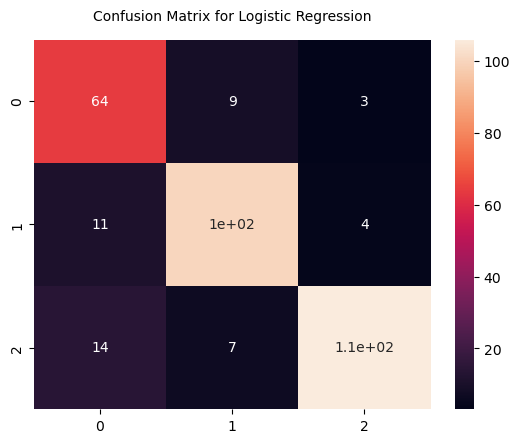

In [40]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(X_test_std)
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Logistic Regression", fontsize=10, y=1.03)

In [41]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.72      0.84      0.78        76
         1.0       0.86      0.87      0.87       115
         2.0       0.94      0.83      0.88       127

    accuracy                           0.85       318
   macro avg       0.84      0.85      0.84       318
weighted avg       0.86      0.85      0.85       318



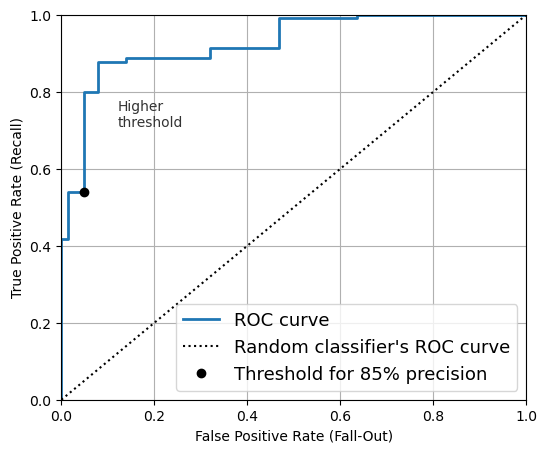

In [42]:
log_reg_ordinal = model
log_reg_ordinal.fit(X_train_std, y_train.ravel())
y_scores = log_reg_ordinal.predict_proba(X_test_std)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores, pos_label=1)
threshold_for_85_precision = 0.85
y_train_pred_85 = (y_scores >= threshold_for_85_precision)
idx_for_threshold_at_85 = (thresholds <= threshold_for_85_precision).argmax()
tpr_85, fpr_85 = tpr[idx_for_threshold_at_85], fpr[idx_for_threshold_at_85]

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_85], [tpr_85], "ko", label="Threshold for 85% precision")


plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

plt.show()

In [43]:
model.coef_

array([[ 0.39126672, -0.81910732,  0.29611835,  1.22495591,  2.27637062,
         0.09462447,  0.6789404 ],
       [-0.57064969,  2.79649173,  0.90201248, -0.03659321, -0.69156501,
         1.00706796,  1.03447971],
       [ 0.17938298, -1.9773844 , -1.19813083, -1.1883627 , -1.58480562,
        -1.10169243, -1.71342011]])

In [44]:
model.intercept_

array([-1.15121212,  1.39900383, -0.24779171])

### Analisis Model

###### Untuk overfitting karena training akurasi dengan testing akurasi tidak beda jauh maka tidak mengalami overfitting. Dan untuk under fitting juga tidak karena hasil akurasi besar. 

##### Untuk Kurva ROC jika mendekati 1 maka model dapat membedakan dengan baik antara kedua kelas. Namun, jika AUC mendekati 0.5, maka model tidak lebih baik daripada model yang melakukan prediksi secara acak. Untuk model yang saya buat Kurva ROC mendekati 1 maka model dapat membedakan dengan baik antara dua kelas
 

### Melakukan sebuah eksperimen tambahan untuk proses tuning terhadap hyperparameter Logistic Regression (gunakan parameter solver: saga regularisasi Lasso).

In [45]:
from sklearn.model_selection import GridSearchCV

param_grid = {'solver':['saga'],
               'penalty':['l1'],
              'C':[100, 10, 1.0, 0.1, 0.01]}

In [46]:
model_lasso = LogisticRegression(max_iter=1000)

In [47]:
grid_search_model = GridSearchCV(model_lasso, param_grid, cv=5)

In [48]:
grid_search_model.fit(X_train_std, y_train.ravel())

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l1'],
                         'solver': ['saga']})

In [49]:
print(f"Best Parameters: {grid_search_model.best_params_}")

Best Parameters: {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}


In [50]:
print(grid_search_model.best_score_)

0.8542807908579719


In [51]:
grid_search_model.best_estimator_.fit(X_train_std, y_train.ravel())

LogisticRegression(max_iter=1000, penalty='l1', solver='saga')

In [52]:
tuned_accuracy = grid_search_model.score(X_test_std, y_test)
tuned_accuracy

0.8490566037735849

### Analisis Perbandingan antara regularisasi Ridge dengan Lasso

#### Model logistic regression dengan regularisasi Ridge dan Lasso keduanya berfungsi untuk mengurangi overfitting pada model, tetapi dengan cara yang berbeda. Regularisasi Ridge memperkenalkan parameter penalti L2 yang menambahkan bobot kuadrat dari koefisien model ke dalam fungsi kerugian. Sementara itu, regularisasi Lasso memperkenalkan parameter penalti L1 yang menambahkan nilai absolut dari koefisien model ke dalam fungsi kerugian. 

#### Alasan mengapa model logistic regression dengan regularisasi Ridge memiliki akurasi lebih besar daripada regularisasi Lasso, antara lain: 

#### Regularisasi Ridge cenderung lebih baik dalam menangani masalah multikolinearitas, di mana beberapa variabel dalam model saling berkorelasi tinggi. Dalam kasus ini, Ridge mampu menangani variabel yang saling berkorelasi tinggi dan menghasilkan koefisien yang lebih stabil, sementara Lasso lebih cenderung menghilangkan satu atau beberapa variabel yang berkorelasi tinggi secara keseluruhan. 

#### Regularisasi Ridge menghasilkan koefisien yang lebih kecil tetapi tidak menyebabkan koefisien menjadi nol, sementara regularisasi Lasso bisa menyebabkan beberapa koefisien menjadi nol secara tegas. Ini dapat menyebabkan Lasso kehilangan beberapa informasi yang berguna dalam model, dan akibatnya, performa model dapat menurun.